In [310]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

Load dataset from .csv file

In [311]:
dataset = pd.read_csv("data.csv", encoding='latin-1')

Display data

In [312]:
pd.set_option("display.max.columns", None)
dataset

,Museum,Specimen _Number,Species,Subspecies,Clade,Sex,Elevation,Body Mass (g),Body _Length _(mm),Head _Length _(mm),Bill Length (mm),Bill Width1 (mm),Bill Width2 (mm),Bill Width3 (mm),Bill Depth1 (mm),Bill Depth2 (mm),Bill Depth3 (mm),Proximal Bill Cross-Sectional_ Area (mm2),Mid-Length Bill Cross-Sectional Area (mm2),Distal Bill Cross-Sectional Area (mm2),Wing Length (mm),Primary 1 (mm),Primary 2 (mm),Primary 3 (mm),Primary 4 (mm),Primary 5 (mm),Primary 6 (mm),Primary 7 (mm),Primary 8 (mm),Primary 9 (mm),Width of Primary 1,Width of Primary 9,Tibiotarsus Width (mm),Tarsometatarsus Length (mm),Tarsometatarsus Width (mm),Digit 1 (mm),Digit 2 (mm),Digit 3 (mm),Digit 4 (mm),Ungual 1 (mm),Ungual 2 (mm),Ungual 3 (mm),Ungual 4 (mm),Central rectrix (mm),Lateral Retrices,Isometric Size Index,Wing Pointedness Index,Wing Convexity Index,Country,State/Province,Region,Locality,Preparation,Latitute (o South),Longitude (o West),Elevation1,Prin1 2,Prin2 2,Prin3 2,Prin4 2,Prin5 2,Species.1,Museum.1,Specimen_Number,D15N,D13C,Prct_Nitrogen,Prct_Carbon,C_N_Ratio,?18O,Species.2,Museum.2,Specimen_Number.1,Isotope_Samp_ID,dDa,[H]a,Unnamed: 76,dDb,[H]b,Mean_dD
0,AMNH,100743.0,albidiventris,NaN,Small,female,3000 m,NaN,199.0,40.70,16.82,4.78,2.30,1.09,4.59,3.92,1.16,68.927171,28.324599,3.972230,97.02,58.75,72.62,74.27,74.08,73.35,69.17,63.52,58.89,57.37,7.09,10.47,1.94,28.24,1.81,21.64,17.16,23.80,15.83,9.36,4.94,6.09,4.87,73.00,63.36,-0.920044,1.156662,0.795454,Venezuela,Merida,NaN,near Quintero,NaN,8.8280,70.693,3000.0,-0.659808,0.068858,-0.564259,-0.399028,0.401902,het,AMNH,100743,8.657597,-20.282404,13.768824,45.368939,3.295048,4.628465,het,AMNH,100743.0,het-A100743a,-61.7,5.18,het-a100743b,-67.200,5.090000,-64.477
1,AMNH,124466.0,albidiventris,NaN,Small,male,"14,000 Ft.",NaN,170.0,39.55,17.14,4.85,1.81,1.04,3.88,3.15,1.03,59.118491,17.911791,3.365274,97.31,59.51,73.50,74.40,75.73,73.23,67.89,63.21,59.38,56.62,6.60,11.05,1.72,29.99,1.65,18.07,15.59,21.38,17.12,7.96,4.73,5.82,5.19,65.65,59.39,-0.913466,1.073165,0.778179,Ecuador,NaN,NaN,Mt. Chimborazo,Skin: Whole; Skeleton: Partial: trunk,-2.0167,78.733,4267.0,-2.235542,-1.127992,-0.629253,-0.119423,0.473132,albd,AMNH,124466,6.189624,-21.047462,13.677862,44.803525,3.275623,4.811276,albd,AMNH,124466.0,alb-A124466a,-76.8,5.35,albd-a124466b,-80.500,4.930000,-78.649
2,NaN,NaN,NaN,NaN,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albd,AMNH,154953,7.732858,-21.400414,13.534914,44.497601,3.287616,1.482136,albd,AMNH,154953.0,alb-A1154953a,-96.7,4.97,albd-a154953b,-96.700,4.820000,-96.701
3,AMNH,154955.0,albidiventris,NaN,Small,female,3600-4000 m,NaN,167.0,40.83,13.54,4.11,1.61,0.96,3.68,3.12,1.32,47.515961,15.780848,3.981026,105.80,63.79,78.96,79.00,76.50,75.37,67.74,61.35,58.38,56.57,7.15,11.92,1.63,30.19,1.64,19.13,16.06,24.09,16.72,8.33,4.95,5.99,5.23,67.21,62.45,-0.875322,0.578194,1.069232,Ecuador,NaN,NaN,Antisana,Skin: Whole; Skeleton: Partial: trunk,-2.8830,78.983,3800.0,-2.177757,-0.157423,-0.011028,0.274117,0.195322,albd,AMNH,154955,7.807918,-20.964647,13.687415,44.716446,3.266975,2.116600,albd,AMNH,154955.0,alb-A154955a,-95.7,5.80,albd-a154955b,-96.700,4.890000,-96.220
4,AMNH,167291.0,albidiventris,NaN,Small,female,3100 m,NaN,167.0,36.78,15.73,4.28,1.58,0.80,4.08,3.08,0.97,54.859748,15.288246,2.437876,93.67,57.03,69.30,70.29,70.29,68.19,60.73,55.87,53.60,52.96,6.52,12.41,1.67,29.95,1.48,19.38,16.17,23.04,15.61,8.66,4.88,6.41,4.91,65.23,60.86,-1.041694,0.722847,0.971886,Ecuador,NaN,NaN,Bestion,Skin: Whole,-3.4170,-79.017,3100.0,-2.369276,0.048209,-0.387181,-0.182293,0.238843,albd,AMNH,167291,9.184018,-19.973817,14.176860,45.503651,3.209713,6.751228,albd,AMNH,167291.0,alb-A167291a,-53.6,5.69,albd-a167291b,-62.700,5.270000,-58.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Process data to remove string columns and rows with NaN elements

In [313]:
print(dataset.shape)
dataset = dataset.drop(columns = ['Museum', 'Subspecies',  'Elevation', 'Species.1', 'Museum.1', '[H]a', 'Preparation', 'Unnamed: 76', 'State/Province', 'Region', 'Locality', 'Species.2', 'Museum.2', 'Specimen_Number.1', 'Isotope_Samp_ID'], axis = 1)
dataset = dataset.dropna()

(439, 80)



## Data analysis
Let's look at some interesting data dependencies

In [111]:
def calculate_mean_value(category, category_list):
    i=0
    for el in category_list:
        df_filter = dataset[category].isin([el])
        df_new = dataset[df_filter].mean().to_frame().T
        df_new[category] = el
        if i == 0:
            result = df_new.copy(deep=True) 
        else:
            result = result.append(df_new)
        i+=1
    return result

['albidiventris', 'albiventris', 'atacamensis', 'excelsior', 'fuscus', 'oustaleti', 'patagonicus']


,Specimen _Number,Body Mass (g),Body _Length _(mm),Head _Length _(mm),Bill Length (mm),Bill Width1 (mm),Bill Width2 (mm),Bill Width3 (mm),Bill Depth1 (mm),Bill Depth2 (mm),Bill Depth3 (mm),Proximal Bill Cross-Sectional_ Area (mm2),Mid-Length Bill Cross-Sectional Area (mm2),Distal Bill Cross-Sectional Area (mm2),Wing Length (mm),Primary 1 (mm),Primary 2 (mm),Primary 3 (mm),Primary 4 (mm),Primary 5 (mm),Primary 6 (mm),Primary 7 (mm),Primary 8 (mm),Primary 9 (mm),Width of Primary 1,Width of Primary 9,Tibiotarsus Width (mm),Tarsometatarsus Length (mm),Tarsometatarsus Width (mm),Digit 1 (mm),Digit 2 (mm),Digit 3 (mm),Digit 4 (mm),Ungual 1 (mm),Ungual 2 (mm),Ungual 3 (mm),Ungual 4 (mm),Central rectrix (mm),Lateral Retrices,Isometric Size Index,Wing Pointedness Index,Wing Convexity Index,Latitute (o South),Longitude (o West),Elevation1,Prin1 2,Prin2 2,Prin3 2,Prin4 2,Prin5 2,Specimen_Number,D15N,D13C,Prct_Nitrogen,Prct_Carbon,C_N_Ratio,?18O,dDa,dDb,[H]b,Mean_dD,Species
0,608512.000000,34.000000,174.000000,35.970000,13.000000,4.410000,1.670000,0.560,3.700000,3.030000,1.010000,51.261367,15.896773,1.776885,96.920000,55.780,68.730000,70.370000,69.290000,68.710000,64.490,58.980000,56.380000,52.550000,6.460000,10.060000,1.930000,30.610000,1.300,18.880000,15.350000,21.090,15.430000,8.430000,4.520,5.570000,4.870000,63.150000,57.040000,-1.015885,1.111138,0.651690,-0.332000,-78.2030,4050.000000,-3.288870,-0.719583,-0.933415,-0.756540,0.592147,6.085120e+05,7.176129,-22.273131,13.871266,45.905594,3.309402,5.811644,-83.900000,-97.100000,5.090000,-90.499000,albidiventris
0,609498.000000,28.300000,169.000000,39.850000,11.960000,4.230000,2.100000,1.080,3.960000,3.550000,0.620000,52.624190,23.420573,2.103610,94.070000,51.760,67.150000,68.190000,66.530000,63.850000,57.750,51.270000,46.310000,45.110000,6.820000,9.840000,1.400000,25.270000,1.390,17.970000,12.790000,20.910,15.880000,7.750000,5.040,5.920000,4.440000,75.750000,64.780000,-1.155503,0.535064,2.011635,-26.809000,-65.2110,3150.000000,-3.641687,0.113833,0.490758,1.573850,-0.998384,6.094980e+05,5.771343,-22.642056,13.725655,45.102260,3.285982,5.276920,-54.300000,-64.700000,5.020000,-59.496000,albiventris
0,796037.000000,51.850000,203.000000,45.455000,19.425000,5.285000,2.355000,1.295,4.955000,3.810000,1.455000,82.549431,28.378006,6.103015,109.155000,62.080,75.350000,76.865000,76.150000,73.000000,68.360,63.660000,60.750000,58.580000,7.845000,11.905000,2.675000,32.360000,1.975,19.990000,18.300000,26.830,19.360000,9.365000,5.830,6.645000,5.860000,82.740000,64.230000,-0.885712,0.925541,0.537463,-13.589500,-72.2190,4133.500000,2.403044,-0.753116,-0.055260,-0.094407,0.313928,3.965889e+11,9.861279,-21.446598,14.063044,45.326623,3.224183,2.960829,-120.067000,-111.141000,5.419342,-115.604000,atacamensis
0,814047.000000,65.000000,211.000000,50.490000,22.000000,5.820000,3.070000,1.310,6.080000,4.560000,1.080000,111.167141,43.979784,4.444725,113.660000,60.020,79.950000,81.480000,81.110000,80.230000,72.870,65.790000,60.610000,57.640000,7.630000,13.070000,2.490000,29.060000,2.090,27.160000,19.280000,29.090,19.440000,14.040000,6.780,9.070000,7.230000,84.200000,70.860000,-0.819891,1.095460,1.756631,5.067000,-75.5180,4000.000000,6.425882,3.818128,-0.425634,-0.371925,-0.185219,8.140470e+05,5.470049,-21.098729,14.389693,46.420923,3.225984,-0.879340,-103.237000,-101.040000,3.950280,-102.139000,excelsior
0,691329.400000,29.990000,183.300000,39.552000,14.269000,3.988000,1.927000,0.883,3.770000,2.843000,0.955000,47.362085,16.934158,2.621722,97.898000,56.928,69.950000,70.525000,69.247000,65.605000,54.404,50.712000,45.861000,44.978000,6.531000,10.393000,1.799000,24.996000,1.491,20.492000,14.933000,22.594,15.406000,9.881000,4.716,6.034000,4.738000,70.489000,60.098000,-1.129359,-0.043667,2.015896,-39.025600,61.9539,18.100000,-3.045371,2.286211,0.790447,1.007948,-0.512297,7.794878e+58,7.516334,-21.354571,13.767316,44.997564,3.269171,5.562173,-66.790000,-71.000000,4.959000,-68.892500,fuscus
0,516070.600000,32.300000,175.6000

A graph of the average size of birds depending on the species

In [131]:
types_list = []
for el in dataset['Species']:
    if el not in types_list:
        types_list.append(el)

df_species = calculate_mean_value('Species',types_list)
df_species

,Specimen _Number,Body Mass (g),Body _Length _(mm),Head _Length _(mm),Bill Length (mm),Bill Width1 (mm),Bill Width2 (mm),Bill Width3 (mm),Bill Depth1 (mm),Bill Depth2 (mm),Bill Depth3 (mm),Proximal Bill Cross-Sectional_ Area (mm2),Mid-Length Bill Cross-Sectional Area (mm2),Distal Bill Cross-Sectional Area (mm2),Wing Length (mm),Primary 1 (mm),Primary 2 (mm),Primary 3 (mm),Primary 4 (mm),Primary 5 (mm),Primary 6 (mm),Primary 7 (mm),Primary 8 (mm),Primary 9 (mm),Width of Primary 1,Width of Primary 9,Tibiotarsus Width (mm),Tarsometatarsus Length (mm),Tarsometatarsus Width (mm),Digit 1 (mm),Digit 2 (mm),Digit 3 (mm),Digit 4 (mm),Ungual 1 (mm),Ungual 2 (mm),Ungual 3 (mm),Ungual 4 (mm),Central rectrix (mm),Lateral Retrices,Isometric Size Index,Wing Pointedness Index,Wing Convexity Index,Latitute (o South),Longitude (o West),Elevation1,Prin1 2,Prin2 2,Prin3 2,Prin4 2,Prin5 2,Specimen_Number,D15N,D13C,Prct_Nitrogen,Prct_Carbon,C_N_Ratio,?18O,dDa,dDb,[H]b,Mean_dD,Species
0,608512.000000,34.000000,174.000000,35.970000,13.000000,4.410000,1.670000,0.560,3.700000,3.030000,1.010000,51.261367,15.896773,1.776885,96.920000,55.780,68.730000,70.370000,69.290000,68.710000,64.490,58.980000,56.380000,52.550000,6.460000,10.060000,1.930000,30.610000,1.300,18.880000,15.350000,21.090,15.430000,8.430000,4.520,5.570000,4.870000,63.150000,57.040000,-1.015885,1.111138,0.651690,-0.332000,-78.2030,4050.000000,-3.288870,-0.719583,-0.933415,-0.756540,0.592147,6.085120e+05,7.176129,-22.273131,13.871266,45.905594,3.309402,5.811644,-83.900000,-97.100000,5.090000,-90.499000,albidiventris
0,609498.000000,28.300000,169.000000,39.850000,11.960000,4.230000,2.100000,1.080,3.960000,3.550000,0.620000,52.624190,23.420573,2.103610,94.070000,51.760,67.150000,68.190000,66.530000,63.850000,57.750,51.270000,46.310000,45.110000,6.820000,9.840000,1.400000,25.270000,1.390,17.970000,12.790000,20.910,15.880000,7.750000,5.040,5.920000,4.440000,75.750000,64.780000,-1.155503,0.535064,2.011635,-26.809000,-65.2110,3150.000000,-3.641687,0.113833,0.490758,1.573850,-0.998384,6.094980e+05,5.771343,-22.642056,13.725655,45.102260,3.285982,5.276920,-54.300000,-64.700000,5.020000,-59.496000,albiventris
0,796037.000000,51.850000,203.000000,45.455000,19.425000,5.285000,2.355000,1.295,4.955000,3.810000,1.455000,82.549431,28.378006,6.103015,109.155000,62.080,75.350000,76.865000,76.150000,73.000000,68.360,63.660000,60.750000,58.580000,7.845000,11.905000,2.675000,32.360000,1.975,19.990000,18.300000,26.830,19.360000,9.365000,5.830,6.645000,5.860000,82.740000,64.230000,-0.885712,0.925541,0.537463,-13.589500,-72.2190,4133.500000,2.403044,-0.753116,-0.055260,-0.094407,0.313928,3.965889e+11,9.861279,-21.446598,14.063044,45.326623,3.224183,2.960829,-120.067000,-111.141000,5.419342,-115.604000,atacamensis
0,814047.000000,65.000000,211.000000,50.490000,22.000000,5.820000,3.070000,1.310,6.080000,4.560000,1.080000,111.167141,43.979784,4.444725,113.660000,60.020,79.950000,81.480000,81.110000,80.230000,72.870,65.790000,60.610000,57.640000,7.630000,13.070000,2.490000,29.060000,2.090,27.160000,19.280000,29.090,19.440000,14.040000,6.780,9.070000,7.230000,84.200000,70.860000,-0.819891,1.095460,1.756631,5.067000,-75.5180,4000.000000,6.425882,3.818128,-0.425634,-0.371925,-0.185219,8.140470e+05,5.470049,-21.098729,14.389693,46.420923,3.225984,-0.879340,-103.237000,-101.040000,3.950280,-102.139000,excelsior
0,691329.400000,29.990000,183.300000,39.552000,14.269000,3.988000,1.927000,0.883,3.770000,2.843000,0.955000,47.362085,16.934158,2.621722,97.898000,56.928,69.950000,70.525000,69.247000,65.605000,54.404,50.712000,45.861000,44.978000,6.531000,10.393000,1.799000,24.996000,1.491,20.492000,14.933000,22.594,15.406000,9.881000,4.716,6.034000,4.738000,70.489000,60.098000,-1.129359,-0.043667,2.015896,-39.025600,61.9539,18.100000,-3.045371,2.286211,0.790447,1.007948,-0.512297,7.794878e+58,7.516334,-21.354571,13.767316,44.997564,3.269171,5.562173,-66.790000,-71.000000,4.959000,-68.892500,fuscus
0,516070.600000,32.300000,175.6000

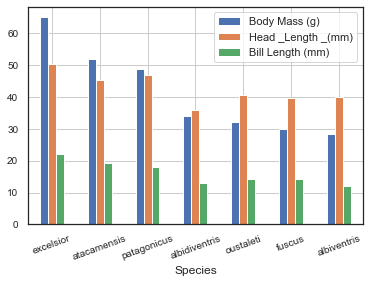

In [318]:
spicies = df_species.sort_values(by="Body Mass (g)", ascending=False)
spicies.plot(x="Species", y=["Body Mass (g)", "Head _Length _(mm)", "Bill Length (mm)"], kind="bar", rot=20, fontsize=10).grid()
plt.savefig('img/species_ch.png')

A graph of the average size of birds depending on the country

In [133]:
country_list = []
data_c = dataset['Country']
for el in data_c:
    if el not in country_list:
        country_list.append(el)
        
df_country = calculate_mean_value('Country',country_list)
df_country

,Specimen _Number,Body Mass (g),Body _Length _(mm),Head _Length _(mm),Bill Length (mm),Bill Width1 (mm),Bill Width2 (mm),Bill Width3 (mm),Bill Depth1 (mm),Bill Depth2 (mm),Bill Depth3 (mm),Proximal Bill Cross-Sectional_ Area (mm2),Mid-Length Bill Cross-Sectional Area (mm2),Distal Bill Cross-Sectional Area (mm2),Wing Length (mm),Primary 1 (mm),Primary 2 (mm),Primary 3 (mm),Primary 4 (mm),Primary 5 (mm),Primary 6 (mm),Primary 7 (mm),Primary 8 (mm),Primary 9 (mm),Width of Primary 1,Width of Primary 9,Tibiotarsus Width (mm),Tarsometatarsus Length (mm),Tarsometatarsus Width (mm),Digit 1 (mm),Digit 2 (mm),Digit 3 (mm),Digit 4 (mm),Ungual 1 (mm),Ungual 2 (mm),Ungual 3 (mm),Ungual 4 (mm),Central rectrix (mm),Lateral Retrices,Isometric Size Index,Wing Pointedness Index,Wing Convexity Index,Latitute (o South),Longitude (o West),Elevation1,Prin1 2,Prin2 2,Prin3 2,Prin4 2,Prin5 2,Specimen_Number,D15N,D13C,Prct_Nitrogen,Prct_Carbon,C_N_Ratio,?18O,dDa,dDb,[H]b,Mean_dD,Country
0,608512.000000,34.000000,174.000000,35.970000,13.000000,4.410000,1.670000,0.560000,3.700000,3.030000,1.010000,51.261367,15.896773,1.776885,96.920000,55.780000,68.730000,70.370000,69.290000,68.710000,64.490000,58.980000,56.380000,52.550000,6.460000,10.060000,1.930000,30.610000,1.300000,18.880000,15.350000,21.090000,15.430000,8.430000,4.520000,5.570000,4.870000,63.150000,57.040000,-1.015885,1.111138,0.651690,-0.332000,-78.203000,4050.000000,-3.288870,-0.719583,-0.933415,-0.756540,0.592147,6.085120e+05,7.176129,-22.273131,13.871266,45.905594,3.309402,5.811644,-83.900000,-97.100000,5.090000,-90.499000,Ecuador
0,631166.666667,39.176190,197.000000,43.756667,16.282381,4.223333,1.922857,0.872857,4.119048,3.448571,0.920476,55.070354,21.139358,2.528488,99.774762,57.611905,71.440000,72.289524,71.077619,68.062381,60.612857,54.844762,51.512857,49.270952,6.727143,10.443810,1.925238,27.155714,1.635238,20.411905,15.854762,24.145238,16.945714,9.547143,5.441429,6.583333,5.267143,76.306667,64.972857,-1.042195,0.474110,1.424370,-44.781571,57.682429,227.230952,-0.765452,0.874072,0.368478,0.620347,-0.409618,2.902375e+124,10.902017,-18.345199,14.182581,46.064121,3.249561,5.281906,-77.290476,-76.576190,5.042857,-76.930952,Argentina
0,793177.000000,49.000000,202.000000,43.530000,18.980000,5.440000,2.550000,1.500000,5.530000,4.120000,1.740000,94.509160,33.005572,8.199557,112.370000,63.060000,78.570000,79.240000,78.810000,75.140000,69.080000,64.370000,61.510000,58.230000,8.150000,13.460000,2.520000,32.430000,1.740000,20.720000,18.030000,26.920000,19.300000,9.240000,5.800000,6.630000,5.700000,81.640000,60.780000,-0.848372,0.851714,0.816201,-16.493000,-68.176000,4000.000000,2.193789,-0.168500,-0.091620,-0.105382,0.136029,7.931770e+05,10.756446,-19.051570,13.786684,45.209634,3.279225,3.067845,-127.307000,-121.201000,5.322666,-124.254000,Bolivia
0,798897.000000,54.700000,204.000000,47.380000,19.870000,5.130000,2.160000,1.090000,4.380000,3.500000,1.170000,70.589702,23.750440,4.006473,105.940000,61.100000,72.130000,74.490000,73.490000,70.860000,67.640000,62.950000,59.990000,58.930000,7.540000,10.350000,2.830000,32.290000,2.210000,19.260000,18.570000,26.740000,19.420000,9.490000,5.860000,6.660000,6.020000,83.840000,67.680000,-0.923053,0.999369,0.258725,-10.686000,-76.262000,4267.000000,2.612300,-1.337731,-0.018900,-0.083433,0.491827,7.988970e+05,8.966113,-23.841625,14.339404,45.443613,3.169142,2.853813,-112.827000,-101.081000,5.516017,-106.954000,Peru
0,814047.000000,65.000000,211.000000,50.490000,22.000000,5.820000,3.070000,1.310000,6.080000,4.560000,1.080000,111.167141,43.979784,4.444725,113.660000,60.020000,79.950000,81.480000,81.110000,80.230000,72.870000,65.790000,60.610000,57.640000,7.630000,13.070000,2.490000,29.060000,2.090000,27.160000,19.280000,29.090000,19.440000,14.040000,6.780000,9.070000,7.230000,84.200000,70.860000,-0.819891,1.095460,1.756631,5.067000,-75.518000,4000.000000,6.425882,3.818128,-0.425634,-0.371925,-0.185219,8.140470e+05,5.470049,-21.098729,14.389693,46.420923,3.225984,-0.8

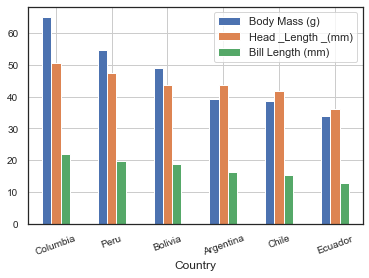

In [319]:
country = df_country.sort_values(by="Body Mass (g)", ascending=False)
country.plot(x="Country", y=["Body Mass (g)", "Head _Length _(mm)", "Bill Length (mm)"], kind="bar", rot=20, fontsize=10).grid()
plt.savefig('img/country.png')

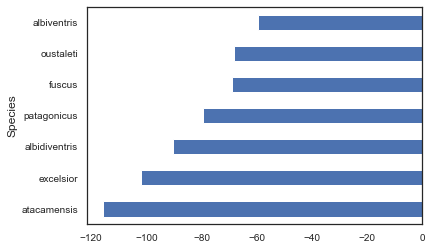

In [320]:
cat_totals = df.groupby("Species")["Mean_dD"].sum().sort_values()
cat_totals.plot(kind="barh", fontsize=10)
plt.savefig('img/mean_db.png')

# PRINCIPAL COMPONENT ANALYSIS

Replace character data with numbers

In [314]:
def words_to_numeric(data):
    num = 0
    count = 0
    types_dict = {}
    for el in data:
        el = el.lower()
        if el not in types_dict:
            types_dict[(el.lower())] = num
            num += 1
        count += 1
    return types_dict

def change_dataset():
    dataset['Sex'] = dataset['Sex'].apply(lambda x: sex_dict[x.lower()])

In [315]:
to_change_list = ('Sex', 'Clade', 'Country')
for name in to_change_list:
    new_data =  words_to_numeric(dataset[name])
    print(new_data)
    dataset[name] = dataset[name].apply(lambda x: new_data[x.lower()])

{'male': 0, 'female': 1, 'unknown': 2}
{'small': 0, 'large': 1}
{'ecuador': 0, 'argentina': 1, 'bolivia': 2, 'peru': 3, 'columbia': 4, 'chile': 5}


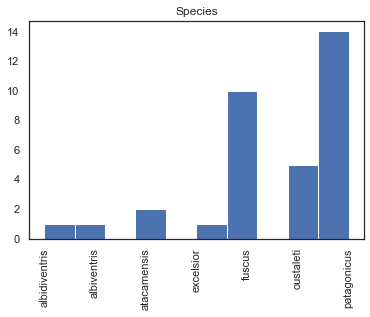

In [321]:
fig, axs = plt.subplots(1, 1)
axs.hist(dataset['Species'], bins=10)
plt.xticks(rotation=90)
axs.set_title('Species')
plt.savefig('img/species.png')

Visualize all the original dimensions

In [194]:
features = dataset.columns[2:6]
print(features)

fig = px.scatter_matrix(
    dataset,
    dimensions=features,
    color="Species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

Index(['Clade', 'Sex', 'Body Mass (g)', 'Body _Length _(mm)'], dtype='object')


Visualize all the principal components

In [309]:
features = dataset.columns
features = features.drop('Species',1)

pca = PCA()
principalComponents = pca.fit_transform(dataset[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=dataset["Species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Visualize a subset of the principal components

In [282]:
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(dataset[features])

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=dataset["Species"],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

2D PCA Scatter Plot

In [317]:
features = dataset.columns
features = features.drop('Species',1)
X =  dataset[features]

pca = PCA(.95)
principalComponents = pca.fit_transform(dataset[features])

fig = px.scatter(components, x=0, y=1, color=dataset['Species'])
fig.show()

In [280]:
new_data =  words_to_numeric(dataset['Species'])
print(new_data)
dataset['Species'] = dataset['Species'].apply(lambda x: new_data[x.lower()])

{'albidiventris': 0, 'albiventris': 1, 'atacamensis': 2, 'excelsior': 3, 'fuscus': 4, 'oustaleti': 5, 'patagonicus': 6}


## PCA  with 95% information contetnt

Standartize values for correct work of algorithm

In [251]:
dataset_np = StandardScaler().fit_transform(dataset)

In [252]:
print(dataset_np.shape)

(34, 65)


Use PCA from sklearn.decomposition with 95% information contetnt from original data

In [253]:
pca = PCA(.95)
principalComponents = pca.fit_transform(dataset_np)
principalDf = pd.DataFrame(data = principalComponents)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Percentage of variance explained by each of the selected components

In [254]:
print(pca.explained_variance_ratio_)

[0.40325797 0.15644432 0.09504684 0.06354329 0.04455785 0.03704055
 0.0319005  0.02922428 0.02469029 0.01894229 0.01481768 0.01232795
 0.00980449 0.00890237]
